## Question 1

In [1]:
%matplotlib inline
from skimage import data
from skimage import io
from skimage import exposure
from skimage import filters
from skimage import segmentation
from skimage import morphology
from skimage import measure
from skimage import color
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import numpy as np

(303, 384)


/Users/kategroschner/anaconda/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


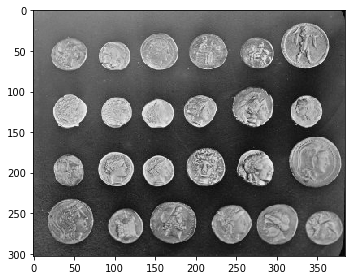

In [2]:
coins = data.coins()
print(coins.shape)
io.imshow(coins)

([array([63., 16., 12., 54., 39., 21., 16.,  8., 12., 11.]),
  array([126., 126.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.])],
 array([   0. ,  126.4,  252.8,  379.2,  505.6,  632. ,  758.4,  884.8,
        1011.2, 1137.6, 1264. ]),
 <a list of 2 Lists of Patches objects>)

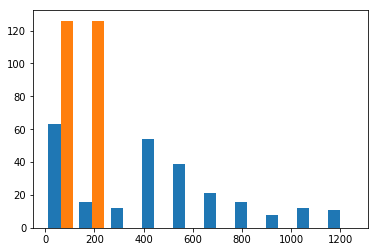

In [3]:
plt.hist(exposure.histogram(coins.flatten()))

### 1.1 Equalizing input image

In [4]:
eq_coins1 = exposure.rescale_intensity(exposure.equalize_adapthist(coins))

([array([21., 22., 42., 80., 23., 10.,  8., 11., 16., 23.]),
  array([256.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.])],
 array([1.95312500e-03, 1.08301758e+02, 2.16601562e+02, 3.24901367e+02,
        4.33201172e+02, 5.41500977e+02, 6.49800781e+02, 7.58100586e+02,
        8.66400391e+02, 9.74700195e+02, 1.08300000e+03]),
 <a list of 2 Lists of Patches objects>)

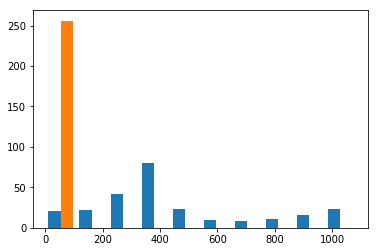

In [5]:
plt.hist(exposure.histogram(eq_coins1.flatten()))

/Users/kategroschner/anaconda/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


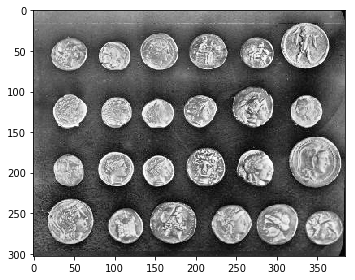

In [6]:
eq_coins2 = exposure.equalize_adapthist(coins)
io.imshow(eq_coins2)

([array([21., 22., 42., 80., 23., 10.,  8., 11., 16., 23.]),
  array([256.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.])],
 array([1.95312500e-03, 1.08301758e+02, 2.16601562e+02, 3.24901367e+02,
        4.33201172e+02, 5.41500977e+02, 6.49800781e+02, 7.58100586e+02,
        8.66400391e+02, 9.74700195e+02, 1.08300000e+03]),
 <a list of 2 Lists of Patches objects>)

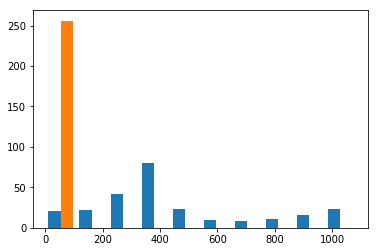

In [7]:
plt.hist(exposure.histogram(eq_coins2.flatten()))

### 1.2 Thresholding using Otsu's Method

In [8]:
thresh = filters.threshold_otsu(eq_coins2)
mask = eq_coins2 >= thresh
thresh_coins2 = eq_coins2.copy()
thresh_coins2[mask]=1
thresh_coins2[~mask]=0
io.imshow(thresh_coins2)

In [9]:
mask = eq_coins2 >= thresh
thresh_coins2 = eq_coins2.copy()
thresh_coins2[mask]=1
thresh_coins2[~mask]=0

(303, 384)
(303, 384)


In [10]:
thresh_coins2 = eq_coins2.copy()
thresh_coins2[mask]=1
thresh_coins2[~mask]=0

/Users/kategroschner/anaconda/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


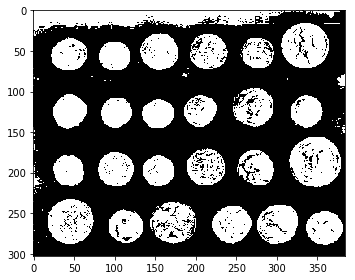

In [11]:
io.imshow(thresh_coins2)

### 1.3 Segmenting

/Users/kategroschner/anaconda/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


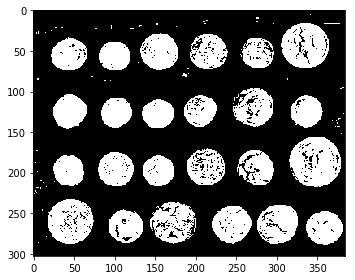

In [12]:
seg_coins = segmentation.clear_border(thresh_coins2)
io.imshow(seg_coins)

### 1.4 Morphological closing

/Users/kategroschner/anaconda/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


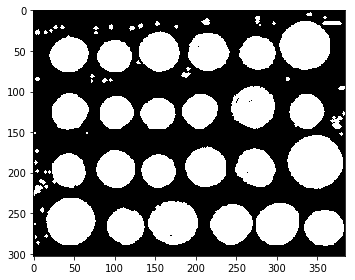

In [13]:
close_coins = morphology.dilation(morphology.dilation(morphology.closing(seg_coins)))
io.imshow(close_coins)

### 1.5 Removing small regions

/Users/kategroschner/anaconda/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


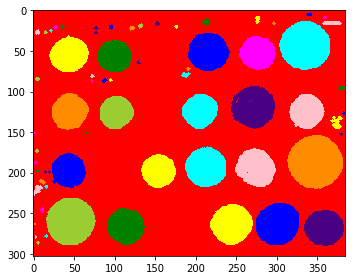

In [14]:
label_coins = measure.label(close_coins)
io.imshow(color.label2rgb(label_coins))
cleaned_coins = morphology.remove_small_objects(label_coins, min_size=1000)
coin_regions = measure.regionprops(cleaned_coins,eq_coins2)
prop_bbox = []
areas = []
eccentricities = []
for region in coin_regions:
    prop_bbox.append(region.bbox)
    areas.append(region.area)
    eccentricities.append(region.eccentricity)
    

/Users/kategroschner/anaconda/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


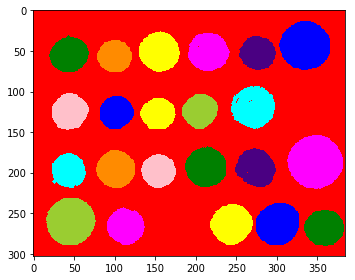

In [15]:
io.imshow(color.label2rgb(cleaned_coins))


In [16]:
count = 0
for i in areas:
    if i > 1000:
        print(i)
        count+=1

2942
1917
1868
1625
1450
1337
2162
1567
1429
1424
1339
1311
3487
1971
1779
1727
1396
1379
2787
2570
2236
1993
1616
1710


In [17]:
prop_bbox

[(14, 303, 74, 366),
 (26, 130, 76, 181),
 (28, 190, 75, 242),
 (31, 20, 76, 69),
 (32, 253, 74, 299),
 (37, 79, 76, 122),
 (94, 244, 146, 298),
 (102, 23, 148, 69),
 (103, 184, 146, 228),
 (103, 315, 147, 359),
 (106, 82, 147, 124),
 (108, 132, 147, 176),
 (154, 313, 220, 381),
 (168, 187, 218, 238),
 (170, 249, 218, 299),
 (173, 78, 219, 126),
 (176, 23, 219, 65),
 (177, 133, 219, 176),
 (231, 16, 290, 77),
 (235, 142, 290, 203),
 (238, 274, 290, 328),
 (239, 218, 290, 271),
 (243, 91, 289, 138),
 (246, 334, 291, 383)]

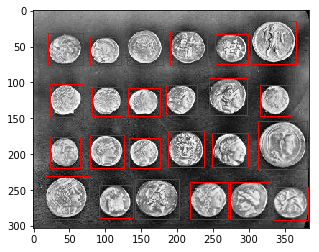

In [18]:
fig, ax = plt.subplots(1)

ax.imshow(eq_coins2, cmap='gray')
for bbox in prop_bbox:
    width = bbox[3]-bbox[1]
    height = bbox[2]-bbox[0]
    rect = patches.Rectangle((bbox[1],bbox[0]),width,height,fill=None,edgecolor = 'red')
    ax.add_patch(rect)

In [19]:
coin_regions[0].perimeter

199.23759005323595

In [20]:
close_coins.shape

(303, 384)